In [1]:
import pandas as pd
import numpy as np
import matplotlib 
import matplotlib.pyplot as plt
import datetime
import psutil
import math
import seaborn as sns
from datetime import timedelta, datetime, tzinfo, timezone, time
from PIL import Image, ImageDraw
from numpy import asarray
from math import atan2,degrees,radians

In [2]:
def show_data():
    train_folder = [7554]#,7556,7557,7558,7559,7560,7561,7563,7569,7570,7571,7572,7573,7574]
    for j in train_folder:
        for i in range(1,22):
            url = r"train/"+str(j)+"/SimpleTest/"+str(i)+".csv"
            data = pd.read_csv(url)
            data.columns = data.columns.str.replace(' ', '')
            submit_time = data.iloc[-1][0]
            start_time = data.iloc[-2][0]
            data.dropna(inplace=True)
            data['X'] = data.X.astype(float)
            data.Time = data.Time.str.replace("00:","").astype(np.float64)
            
            fig=plt.figure(figsize=(20,5))

            ax= fig.add_subplot(1, 2, 1)
            ax.plot(data.Pressure,"#FF8000")
            ax.set_title("Pressure",fontdict={'fontsize': 20})

            ax2 = fig.add_subplot(1, 2, 2)
            ax2.plot(data.Time,c='b')
            ax2.set_title("Time",fontdict={'fontsize': 20})

            plt.show()
            hand_lifts = 0
            rolling_std = data.Time.rolling(window=20).std()

            for i in range(len(data.Time)-1):
                if (data.Time[i+1] > data.Time[i] + rolling_std[i]):
                    hand_lifts +=1

            print("Number of hand lifts: " + str(hand_lifts))

>  Notice that file number 22 does not exist (there is only an empty image), we will ignore this file.

In [501]:
data = pd.read_csv(r'train/7554/SimpleTest/4.csv')

In [502]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 411 entries, 0 to 410
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   X          411 non-null    object 
 1    Y         409 non-null    float64
 2    Pressure  409 non-null    float64
 3    TiltX     409 non-null    float64
 4    TiltY     409 non-null    float64
 5    Time      409 non-null    object 
dtypes: float64(4), object(2)
memory usage: 19.4+ KB


In [503]:
#remove the extra spaces in the columns.
print(data.columns)
data.columns = data.columns.str.replace(' ', '')
data.head(3)

Index(['X', ' Y', ' Pressure', ' TiltX', ' TiltY', ' Time'], dtype='object')


,X,Y,Pressure,TiltX,TiltY,Time
0,847.805058320822,696.243908,0.058579,-4762.0,723.0,00:07.4715108
1,848.068368171844,696.085922,0.061509,-4762.0,723.0,00:07.4871337
2,848.437001963275,695.769950,0.065415,-4762.0,723.0,00:07.5028896


In [504]:
submit_time = data.iloc[-1][0]
start_time = data.iloc[-2][0]
data.dropna(inplace=True)
print(start_time)
print(submit_time)

total_time = float(submit_time[37:]) - float(start_time[38:])
print("Total time drawing: 00:" +str(total_time))

Time Elapsed till drawing started: 00:07.4715108
Time Elapsed till drawing submit: 00:12.8899532
Total time drawing: 00:5.418442400000001


In [505]:
data['X'] = data.X.astype(float)

In [506]:
# change the Time column to float
data.Time = data.Time.str.replace("00:","").astype(np.float64)

In [507]:
data.head(3)

,X,Y,Pressure,TiltX,TiltY,Time
0,847.805058,696.243908,0.058579,-4762.0,723.0,7.471511
1,848.068368,696.085922,0.061509,-4762.0,723.0,7.487134
2,848.437002,695.769950,0.065415,-4762.0,723.0,7.502890


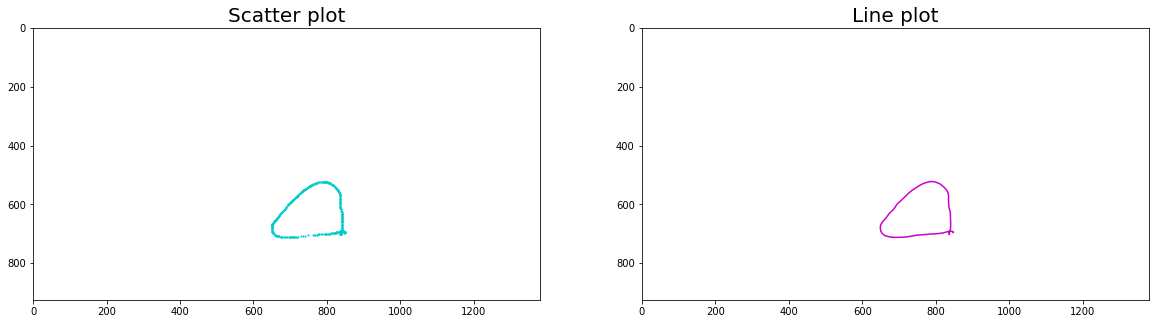

In [508]:
fig=plt.figure(figsize=(20,5))
ax= fig.add_subplot(1, 2, 1)

plt.gca().invert_yaxis()
ax.scatter(data.X,data.Y,s=1,c='#00CCCC')
ax.set_xbound(lower=0.0, upper=1381)
ax.set_ybound(lower=0.0, upper=925)
ax.set_title("Scatter plot",fontdict={'fontsize': 20})

ax2 = fig.add_subplot(1, 2, 2)
plt.gca().invert_yaxis()
ax2.plot(data.X,data.Y,"#CC00CC")
ax2.set_xbound(lower=0.0, upper=1381)
ax2.set_ybound(lower=0.0, upper=925)
ax2.set_title("Line plot",fontdict={'fontsize': 20})

plt.show()

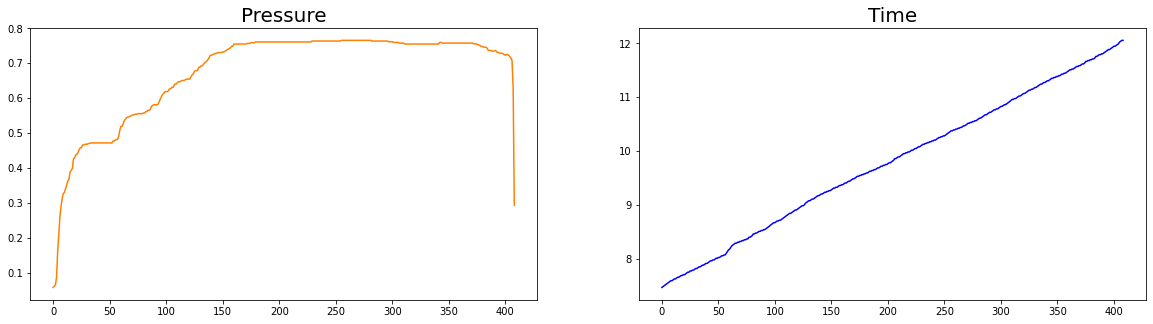

In [509]:
fig=plt.figure(figsize=(20,5))

ax= fig.add_subplot(1, 2, 1)
ax.plot(data.Pressure,"#FF8000")
ax.set_title("Pressure",fontdict={'fontsize': 20})

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(data.Time,c='b')
ax2.set_title("Time",fontdict={'fontsize': 20})

plt.show()

## *Hand lifts:*

In [510]:
hand_lifts = 0
rolling_std = data.Time.rolling(window=14).std()

for i in range(len(data.Time)-1):
    if (data.Time[i+1] > data.Time[i] + rolling_std[i]):
        hand_lifts +=1
        
print("Number of hand lifts: " + str(hand_lifts))

Number of hand lifts: 0


## *Number of lines:*

In [511]:
def calculateAngle(X1,X0,Y1,Y0):
    deltaX = (X1 - X0)**2
    deltaY = (Y1 - Y0)**2
    angle = (math.atan2(deltaY,deltaX))*(180/math.pi)
    #if angle < 0:
    #    angle = 360 + angle
    return angle

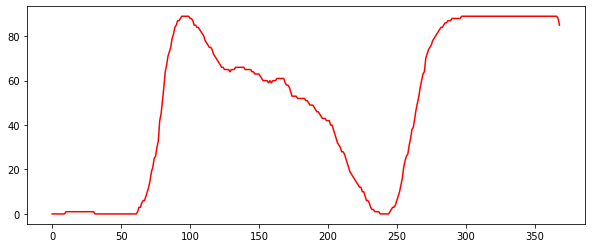

In [528]:
angels = []
jump = int((len(data))/10)
for i in range(0,len(data.X)-jump):
    angels.append(int(calculateAngle(data.X[i+jump],data.X[i],data.Y[i+jump],data.Y[i])))
    
angels = pd.Series(angels)

fig = plt.figure(figsize=(10, 4))
plt.plot(angels,"r")

In [533]:
numOfLines = 0
rolling_std = angels.std()

for i in range(0,len(angels)-1):
    if (abs(angels[i+1] - angels[i]) < 1) :
        continue
    elif (abs(angels[i+1] - angels[i]) > rolling_std) or (angels[i] > angels[i+1] + rolling_std) :
        numOfLines = numOfLines + 1
        
if numOfLines == 0:
    numOfLines += 1 
print("Number of lines: " + str(numOfLines))

Number of lines: 1


## *Open or closed shape:*
Only relevant for some of the drawings.

(3,4,8,11,13,16,17,19,20,21)

In [361]:
img = Image.open(r'train/7554/SimpleTest/3.PNG')
img = img.convert("RGB")
img = img.crop((0,220,1360,885))

In [362]:
target_pixel = (0,0)
target_color = (255,255,0)
ImageDraw.floodfill(img,target_pixel,target_color)#,thresh=0.5
im = asarray(img)

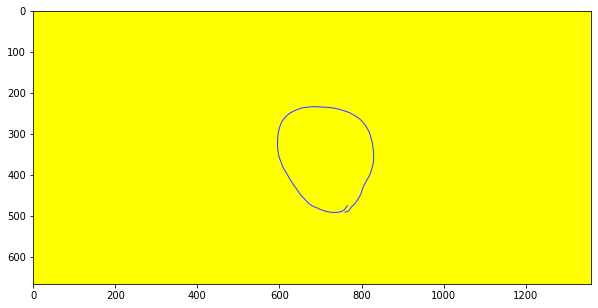

In [363]:
fig = plt.figure(figsize=(10, 7))  
plt.imshow(img)

In [364]:
count =0 
for i in range(im.shape[0]):
    for j in range(im.shape[1]):
            #for q in range(3):
        if ((im[i][j] == [255,255,255]).all() == True):
            count+=1
if count == 0:
    print ("Open Shape")
else: 
    print ("Close Shape")

Open Shape


<IPython.core.display.Javascript object>


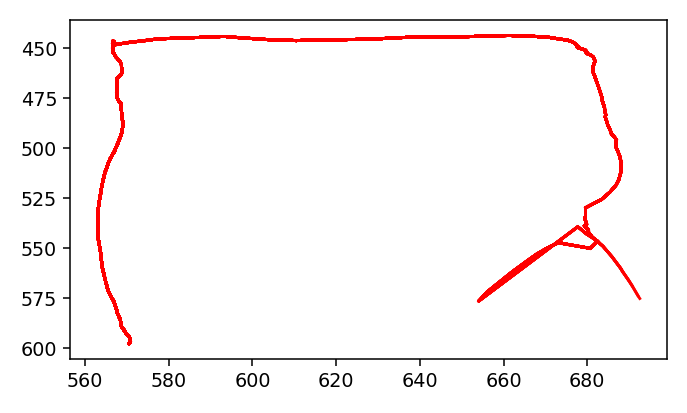

In [133]:
#import psutil
%matplotlib notebook

#plt.rcParams['animation.html'] = 'jshtml'

fig = plt.figure(figsize=(5,3),dpi=100)
ax = fig.add_subplot(111)
plt.gca().invert_yaxis()
ax.set_xbound(lower=0.0, upper=1381)
ax.set_ybound(lower=0.0, upper=925)
plt.tight_layout()
plt.show()


In [134]:
c=[]
d=[]
for i in range (len(data.X)):
    c.append(data.X[i])
    d.append(data.Y[i])
    plt.tight_layout()
    ax.plot(c,d , color='r')
    fig.canvas.draw() 
plt.close()
